# Ice Cover Classification

In [2]:
import sys
sys.path.insert(1,'../')
import numpy as np
from sklearn.neighbors import NearestCentroid
from raster_data import RasterData
from display import __normalize_array
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from project_manager import ProjectManager
import pandas as pd
import seaborn as sns

## Classification

In [ ]:
correspondance = {
    'Vegetation': 'tab:grey',
    'Dark Earth': 'tab:brown',
    'Earth': 'tab:blue',
}

my_colors = {
    'Ice': 0,
    'Ground': 1,
    'Water': 2,
}
custom_cmap = ListedColormap(correspondance.values())
patches = [mpatches.Patch(color=custom_cmap(v), 
                          label=k) for k,v in 
           sorted(my_colors.items(), key=lambda t: t[0])]

In [3]:
ice_file = '../../data/ice.npy'
water_file = '../../data/water.npy'
earth_file = '../../data/ground.npy'
sample_size = 500000

In [4]:
ice = np.load(ice_file)
ground = np.load(earth_file)
water = np.load(water_file)

In [5]:
ice_size = ice.shape[0]
ground_size = ground.shape[0]
water_size = water.shape[0]

ice_sel = np.random.randint(0,ice_size, sample_size)
gr_sel = np.random.randint(0,ground_size, sample_size)
wat_sel = np.random.randint(0,water_size, sample_size)

ice = ice[ice_sel]
ground = ground[gr_sel]
water = water[wat_sel]

In [6]:
target = np.array([0,1,2]).repeat(sample_size)
input_variable = np.vstack((ice,ground,water))

In [7]:
clf = NearestCentroid()
clf.fit(input_variable,target)

NearestCentroid()

In [30]:
img_dir = '../../projects/ice/data/2020_07_01/GRANULE/L2A_T27XVA_A017339_20200701T135733/IMG_DATA/R10m/T27XVA_20200701T135739_TCI_10m.jp2'
img = RasterData(img_dir).array.astype(np.uint8)

In [ ]:
pred = clf.predict(img.reshape(-1,3)).reshape(*img.shape[:2])

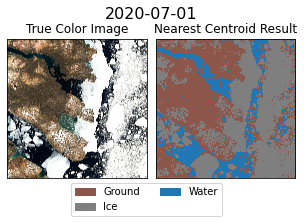

In [16]:
fig, axs = plt.subplots(1, 2)

axs[0].imshow(img)
axs[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axs[0].set_title('True Color Image')

axs[1].imshow(pred,cmap=custom_cmap)
axs[1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axs[1].set_title('Nearest Centroid Result')


fig.set_figheight(3)
fig.set_figwidth(5)
fig.suptitle('2020-07-01', fontsize=16)
fig.tight_layout()

fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)
axs.flatten()[-2].legend(handles=patches, loc=10, bbox_to_anchor=(1.0, -0.15), ncol=2)
plt.savefig('../../figures/centroid_result.png', dpi =300)

# Creating RGB Quadrant

In [221]:
date1 = '../../projects/ice/data/2020_04_14/GRANULE/L2A_T27XVA_A025132_20200414T135028/IMG_DATA/R10m/T27XVA_20200414T135031_TCI_10m.jp2'
date2 = '../../projects/ice/data/2020_07_01/GRANULE/L2A_T27XVA_A017339_20200701T135733/IMG_DATA/R10m/T27XVA_20200701T135739_TCI_10m.jp2'
date3 = '../../projects/ice/data/2020_08_25/GRANULE/L2A_T27XVA_A027034_20200825T140020/IMG_DATA/R10m/T27XVA_20200825T140021_TCI_10m.jp2'
date4 = '../../projects/ice/data/2020_09_04/GRANULE/L2A_T27XVA_A027177_20200904T140019/IMG_DATA/R10m/T27XVA_20200904T140021_TCI_10m.jp2'

def get_date(date):
    return date.split('/')[-6].replace('_', '-')

for date in [date1, date2, date3, date4]:
    img = RasterData(date).array.astype(np.uint8)
    plt.imsave('../../ice/rgb_{}.png'.format(get_date(date)), img,  dpi=600)

In [ ]:
date1 = '../../ice/rgb_2020-04-14.png'
date2 = '../../ice/rgb_2020-07-01.png'
date3 = '../../ice/rgb_2020-08-25.png'
date4 = '../../ice/rgb_2020-09-04.png'


fig, axs = plt.subplots(2, 2)

def get_date(date):
    return date.split('/')[-1].replace('rgb_','').replace('.png','')

def get_image(date):
    return plt.imread(date)

axs[0, 0].imshow(get_image(date1))
axs[0,0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axs[0, 0].set_title(get_date(date1).replace('_','-'))

axs[0, 1].imshow(get_image(date2))
axs[0, 1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axs[0, 1].set_title(get_date(date2).replace('_','-'))


fig.set_figheight(6)
fig.set_figwidth(5)
fig.suptitle('Change Of Ice Cover', fontsize=16)
fig.tight_layout()

plt.savefig('../../ice/rgb_ice_change.png',  dpi=600)

## Getting The Results For all our Data

In [8]:
date1 = '../../projects/ice/data/2020_02_22/GRANULE/L2A_T27XVA_A015480_20200222T140104/IMG_DATA/R10m/T27XVA_20200222T140109_TCI_10m.jp2'
date2 = '../../projects/ice/data/2020_03_28/GRANULE/L2A_T26XPF_A024889_20200328T140010/IMG_DATA/R10m/T26XPF_20200328T140011_TCI_10m.jp2'
date3 = '../../projects/ice/data/2020_04_09/GRANULE/L2A_T27XVA_A016152_20200409T134722/IMG_DATA/R10m/T27XVA_20200409T134719_TCI_10m.jp2'
date4 = '../../projects/ice/data/2020_04_14/GRANULE/L2A_T27XVA_A025132_20200414T135028/IMG_DATA/R10m/T27XVA_20200414T135031_TCI_10m.jp2'
date5 = '../../projects/ice/data/2020_05_11/GRANULE/L2A_T27XVA_A025518_20200511T134048/IMG_DATA/R10m/T27XVA_20200511T134051_TCI_10m.jp2'
date6 = '../../projects/ice/data/2020_06_18/GRANULE/L2A_T26XPF_A017153_20200618T134728/IMG_DATA/R10m/T26XPF_20200618T134729_TCI_10m.jp2'
date7 = '../../projects/ice/data/2020_07_01/GRANULE/L2A_T27XVA_A017339_20200701T135733/IMG_DATA/R10m/T27XVA_20200701T135739_TCI_10m.jp2'
date8 = '../../projects/ice/data/2020_08_24/GRANULE/L2A_T27XVA_A018111_20200824T133726/IMG_DATA/R10m/T27XVA_20200824T133729_TCI_10m.jp2'
date9 = '../../projects/ice/data/2020_08_25/GRANULE/L2A_T27XVA_A027034_20200825T140020/IMG_DATA/R10m/T27XVA_20200825T140021_TCI_10m.jp2'
date10 = '../../projects/ice/data/2020_08_29/GRANULE/L2A_T26XPF_A027091_20200829T134048/IMG_DATA/R10m/T26XPF_20200829T134051_TCI_10m.jp2'
date11 = '../../projects/ice/data/2020_09_04/GRANULE/L2A_T27XVA_A027177_20200904T140019/IMG_DATA/R10m/T27XVA_20200904T140021_TCI_10m.jp2'
date12 = '../../projects/ice/data/2020_10_16/GRANULE/L2A_T26XPF_A018869_20201016T135054/IMG_DATA/R10m/T26XPF_20201016T135059_TCI_10m.jp2'

dates = [date1, date2, date3 , date4, date5, date6, date7, date8, date9, date10, date11, date12]

def get_date(string):
    return (string.split('/')[5].replace('_','-'))
    
specific_dates = [get_date(date) for date in dates]
water, ice, ground = [], [], []

In [9]:
for date in dates:
    img = RasterData(date).array.astype(np.uint8)
    img = img.reshape(-1,3)
    pred = clf.predict(img.reshape(-1,3))
    index, values = np.unique(pred, return_counts=True)
    total = np.sum(values)
    ice.append(values[0]/total *100)
    ground.append(values[1]/total * 100)
    water.append(values[2]/total * 100)

## Getting ESA classification results

In [10]:
catalog_dir = '../../projects/ice/ice.csv'
esa_catalog = pd.read_csv(catalog_dir)

In [11]:
esa_catalog = esa_catalog[esa_catalog.cloudcoverpercentage < 10]
esa_catalog.head()

,Unnamed: 0,summary,vegetationpercentage,notvegetatedpercentage,waterpercentage,unclassifiedpercentage,snowicepercentage,cloudcoverpercentage,geometry,size
2,2b7861b9-56e5-4323-a27c-36d95a52f387,"Date: 2020-10-22T14:11:39.024Z, Instrument: MS...",0.000601,0.032486,15.920371,5.909905,69.643354,6.226805,"MULTIPOLYGON (((-23.037964 71.96521965350138, ...",626.26 MB
3,fd99d2c2-a9c9-4321-8984-96998e65b2c8,"Date: 2020-10-22T14:11:39.024Z, Instrument: MS...",0.000688,0.049045,14.938554,5.974318,70.487487,6.272776,"MULTIPOLYGON (((-23.899933 71.9897729527755, -...",611.48 MB
6,62d1bd6b-3773-49b2-ad88-816ec82c6cb2,"Date: 2020-10-16T13:50:59.024Z, Instrument: MS...",0.000262,0.027241,34.028065,4.661857,53.506184,4.810312,"MULTIPOLYGON (((-23.899933 71.9897729527755, -...",1.07 GB
7,4bfba604-d08e-4dab-9f80-50c224896191,"Date: 2020-10-16T13:50:59.024Z, Instrument: MS...",0.000425,0.019491,35.268259,4.630378,52.571845,4.533116,"MULTIPOLYGON (((-20.93509 71.91662516221517, -...",1.07 GB
14,aecac25a-8ba1-45e5-a5d9-20cd3ac42893,"Date: 2020-10-09T14:00:09.024Z, Instrument: MS...",0.000617,0.023879,24.104246,4.024012,61.712486,6.429098,"MULTIPOLYGON (((-20.93509 71.91662516221517, -...",1.05 GB


In [12]:
def remove_partial_data(data_size):
    num = data_size.split('.')[0][0]
    num = int(num)
    if num == 1 or num == 9:
        return "True"
    
    return "False"

def get_date(summary):
    return summary.split(',')[0].split('T')[0].split(':')[1].replace(' ', '')

In [13]:
esa_catalog['date'] = esa_catalog['summary'].apply(get_date)
esa_catalog['date'] = pd.to_datetime(esa_catalog['date'])

In [14]:
esa_catalog = esa_catalog.sort_values(by='date')

In [15]:
desired_catalog = esa_catalog.loc[esa_catalog['date'].isin(specific_dates)].iloc[::2]

In [16]:
desired_catalog.shape

(12, 11)

In [17]:
esa_water = desired_catalog['waterpercentage']
esa_ice = desired_catalog['snowicepercentage']
esa_grounnd = desired_catalog['notvegetatedpercentage']
esa_ground2 = desired_catalog['unclassifiedpercentage']
cloud = desired_catalog['cloudcoverpercentage']

In [18]:
test = np.array(esa_grounnd)   + np.array(esa_ground2)

In [19]:
sns.set_style('darkgrid')

### Plotting all the results

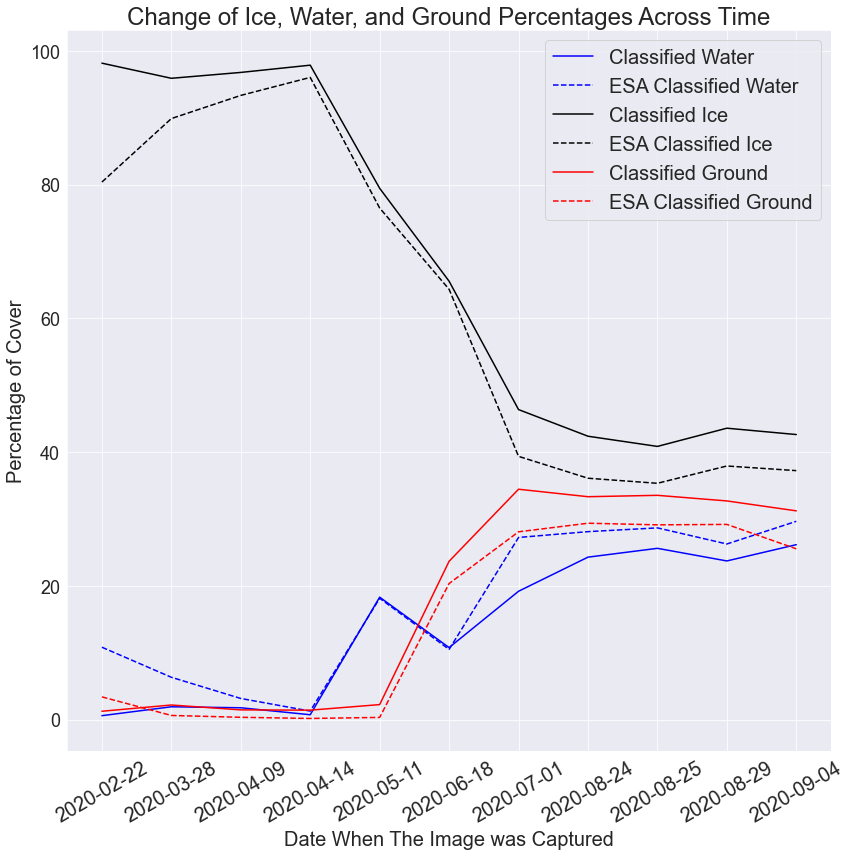

In [21]:
plt.figure(figsize=(12,12))
x = range(1,12)

plt.plot(x, water[:-1], 'b', label='Classified Water')
plt.plot(x, esa_water[:-1], 'b--',  label='ESA Classified Water')

plt.plot(x, ice[:-1], 'k', label='Classified Ice')
plt.plot(x, esa_ice[:-1],'k--', label='ESA Classified Ice')

plt.plot(x, ground[:-1],'r', label = 'Classified Ground')
plt.plot(x, test[:-1],'r--', label = 'ESA Classified Ground')

plt.yticks(fontsize=18)
plt.xticks(x, specific_dates[:-1], rotation='30',fontsize=20)

plt.xlabel('Date When The Image was Captured',fontsize=20)
plt.ylabel('Percentage of Cover',fontsize=20)
plt.title('Change of Ice, Water, and Ground Percentages Across Time',fontsize=24)
plt.legend(loc=0, fontsize=20)
plt.tight_layout()
plt.savefig('../../figures/ice_lineplot_.png', dpi=300)